In [1]:
import pandas as pd
IMPACT_CWD='~/Downloads/impact/'
bl_book = pd.ExcelFile(IMPACT_CWD+'BHQ_Research_2018_01_Access用_20200108.xlsx') # base lien
fu_book = pd.ExcelFile(IMPACT_CWD+'BHQ_Research_2018_02_Access用_20200108.xlsx') # follow up

IDsQCfailed=["MR0011_0742","MR0011_0770","MR0011_0810"] # please define IDs here

#sheet_namesメソッドでExcelブック内の各シートの名前をリストで取得できる
bl_sheet_name = bl_book.sheet_names
fu_sheet_name = fu_book.sheet_names

In [2]:
#DataFrameとして一つ目のsheetを読込
fu_sheet_df = fu_book.parse(fu_sheet_name[0],skiprows=3,skipfooter=5)
fu_sheet_df=fu_sheet_df[fu_sheet_df[fu_sheet_df.columns[1]].str.contains("",na=False)] # id exists

#読み込んだシート名の確認
print("Sheet name:", fu_sheet_name[0])
#print(fu_sheet_df.keys())
fu_sheet_df=fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_02","Age_02","Gender_12_02","MRI_Imaging_Date_02",\
                               "FABHQ_02","FABHQ_DMN_02","FABHQ_CEN_02","FABHQ_SN_02",\
                               "GMBHQ_02","GMBHQ_DMN_02","GMBHQ_CEN_02","GMBHQ_SN_02",\
                               "SPA_Unrelated_SUM_01","TMT_PartA_01_02","TMT_PartB_01_02"]] #,"MMSEJ_SUM_01","CESD_Score_01"
"""
ImPACT_ID	MRI_ID_01	Arm_Type_01	Arm_Number_01	Age_01	Gender_MF_01	Gender_12_01	MRI_Imaging_Date_01	MRI_Imaging_Time_01	
Height_01	Weight_01	Systolic_BP_01	Diastolic_BP_01	Pulse_01	
FABHQ_01	FABHQ_DMN_01	FABHQ_CEN_01	FABHQ_SN_01	GMBHQ_01	GMBHQ_DMN_01	GMBHQ_CEN_01	GMBHQ_SN_01	
SFC_Raw_01_01	SFC_Raw_02_01	SFC_Raw_03_01	SFC_Raw_04_01	SFC_Raw_05_01	SFC_Raw_06_01	SFC_Raw_07_01	SFC_Raw_08_01	SFC_Raw_09_01	SFC_Raw_10_01	SFC_Raw_11_01	SFC_Raw_12_01	SFC_Raw_13_01	SFC_Raw_14_01	SFC_Raw_15_01	SFC_Raw_16_01	SFC_Raw_17_01	SFC_Raw_18_01	SFC_Raw_19_01	SFC_Raw_20_01	
SFC_Physical_01	SFC_Mental_01	SFC_Score_01	
CESD_Raw_01_01	CESD_Raw_02_01	CESD_Raw_03_01	CESD_Raw_04_01	CESD_Raw_05_01	CESD_Raw_06_01	CESD_Raw_07_01	CESD_Raw_08_01	CESD_Raw_09_01	CESD_Raw_10_01	CESD_Raw_11_01	CESD_Raw_12_01	CESD_Raw_13_01	CESD_Raw_14_01	CESD_Raw_15_01	CESD_Raw_16_01	CESD_Raw_17_01	CESD_Raw_18_01	CESD_Raw_19_01	CESD_Raw_20_01	
CESD_Score_01_01	CESD_Score_02_01	CESD_Score_03_01	CESD_Score_04_01	CESD_Score_05_01	CESD_Score_06_01	CESD_Score_07_01	CESD_Score_08_01	CESD_Score_09_01	CESD_Score_10_01	CESD_Score_11_01	CESD_Score_12_01	CESD_Score_13_01	CESD_Score_14_01	CESD_Score_15_01	CESD_Score_16_01	CESD_Score_17_01	CESD_Score_18_01	CESD_Score_19_01	CESD_Score_20_01	
CESD_Score_01	CESD_T_01	
STAI_Raw_01_01	STAI_Raw_02_01	STAI_Raw_03_01	STAI_Raw_04_01	STAI_Raw_05_01	STAI_Raw_06_01	STAI_Raw_07_01	STAI_Raw_08_01	STAI_Raw_09_01	STAI_Raw_10_01	STAI_Raw_11_01	STAI_Raw_12_01	STAI_Raw_13_01	STAI_Raw_14_01	STAI_Raw_15_01	STAI_Raw_16_01	STAI_Raw_17_01	STAI_Raw_18_01	STAI_Raw_19_01	STAI_Raw_20_01	STAI_Raw_21_01	STAI_Raw_22_01	STAI_Raw_23_01	STAI_Raw_24_01	STAI_Raw_25_01	STAI_Raw_26_01	STAI_Raw_27_01	STAI_Raw_28_01	STAI_Raw_29_01	STAI_Raw_30_01	STAI_Raw_31_01	STAI_Raw_32_01	STAI_Raw_33_01	STAI_Raw_34_01	STAI_Raw_35_01	STAI_Raw_36_01	STAI_Raw_37_01	STAI_Raw_38_01	STAI_Raw_39_01	STAI_Raw_40_01	
STAI_Y1_P_01	STAI_Y1_A_01	STAI_Y2_P_01	STAI_Y2_A_01	STAI_Y1_SUM_01	STAI_Y2_SUM_01	STAI_Y1_T_01	STAI_Y2_T_01	STAI_Y1_5D_01	STAI_Y2_5D_01	
POMS2_Raw_01_01	POMS2_Raw_02_01	POMS2_Raw_03_01	POMS2_Raw_04_01	POMS2_Raw_05_01	POMS2_Raw_06_01	POMS2_Raw_07_01	POMS2_Raw_08_01	POMS2_Raw_09_01	POMS2_Raw_10_01	POMS2_Raw_11_01	POMS2_Raw_12_01	POMS2_Raw_13_01	POMS2_Raw_14_01	POMS2_Raw_15_01	POMS2_Raw_16_01	POMS2_Raw_17_01	POMS2_Raw_18_01	POMS2_Raw_19_01	POMS2_Raw_20_01	POMS2_Raw_21_01	POMS2_Raw_22_01	POMS2_Raw_23_01	POMS2_Raw_24_01	POMS2_Raw_25_01	POMS2_Raw_26_01	POMS2_Raw_27_01	POMS2_Raw_28_01	POMS2_Raw_29_01	POMS2_Raw_30_01	POMS2_Raw_31_01	POMS2_Raw_32_01	POMS2_Raw_33_01	POMS2_Raw_34_01	POMS2_Raw_35_01	
POMS2_AH_01	POMS2_CB_01	POMS2_DD_01	POMS2_FI_01	POMS2_TA_01	POMS2_VA_01	POMS2_F_01	POMS2_TMD_01	POMS2_AH_T_01	POMS2_CB_T_01	POMS2_DD_T_01	POMS2_FI_T_01	POMS2_TA_T_01	POMS2_VA_T_01	POMS2_F_T_01	POMS2_TMD_T_01	
MMSEJ_Raw_01_01	MMSEJ_Raw_02_01	MMSEJ_Raw_03_01	MMSEJ_Raw_04_01	MMSEJ_Raw_05_01	MMSEJ_Raw_06_01	MMSEJ_Raw_07_01	MMSEJ_Raw_08_01	MMSEJ_Raw_09_01	MMSEJ_Raw_10_01	MMSEJ_Raw_11_01	MMSEJ_Raw_12_01	MMSEJ_Raw_13_01	MMSEJ_Raw_14_01	MMSEJ_Raw_15_01	MMSEJ_Raw_16_01	MMSEJ_Raw_17_01	MMSEJ_Raw_18_01	MMSEJ_Raw_19_01	MMSEJ_Raw_20_01	MMSEJ_Raw_21_01	MMSEJ_Raw_22_01	MMSEJ_Raw_23_01	MMSEJ_Raw_24_01	MMSEJ_Raw_25_01	MMSEJ_Raw_26_01	MMSEJ_Raw_27_01	MMSEJ_Raw_28_01	MMSEJ_Raw_29_01	MMSEJ_Raw_30_01	MMSEJ_Raw_31_01	MMSEJ_Raw_32_01	MMSEJ_Raw_33_01	MMSEJ_Raw_34_01	MMSEJ_Raw_35_01	
MMSEJ_SUM_01	
SPA_Related_Raw_01_01	SPA_Related_Raw_02_01	SPA_Related_Raw_03_01	SPA_Unrelated_Raw_01_01	SPA_Unrelated_Raw_02_01	SPA_Unrelated_Raw_03_01	
SPA_Unrelated_SUM_01	SPA_Rank_01	
Stroop_01_01	Stroop_02_01	Stroop_03_01	Stroop_Score_01	
TMT_PartA_01_01	TMT_PartA_02_01	TMT_PartA_03_01	TMT_PartA_04_01	
TMT_PartB_01_01	TMT_PartB_02_01	TMT_PartB_03_01	TMT_PartB_04_01	Memo	END
"""

#読み込んだシートの末尾5行を表示
print(fu_sheet_df.shape)
#print(fu_sheet_df.tail(5))

Sheet name: BHQ_Research_2018_02_All
(165, 16)


In [3]:
bl_sheet_df = bl_book.parse(bl_sheet_name[0],skiprows=3,skipfooter=5)
bl_sheet_df=bl_sheet_df[bl_sheet_df[bl_sheet_df.columns[1]].str.contains("",na=False)] # id exists

#読み込んだシート名の確認
print("Sheet name:", bl_sheet_name[1])

#bl_sheet_df.keys())
bl_sheet_df=bl_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","Age_01","Gender_12_01","MRI_Imaging_Date_01",\
                               "FABHQ_01","FABHQ_DMN_01","FABHQ_CEN_01","FABHQ_SN_01",\
                               "GMBHQ_01","GMBHQ_DMN_01","GMBHQ_CEN_01","GMBHQ_SN_01",\
                               "SPA_Unrelated_SUM_01","TMT_PartA_01_01","TMT_PartB_01_01",\
                               "MMSEJ_SUM_01","CESD_Score_01"]] # only base lines have MMSE
#読み込んだシートの末尾5行を表示
print(bl_sheet_df.shape)
#print(bl_sheet_df.tail(5))

Sheet name: GMBHQ_01
(165, 18)


In [4]:
bl_fu_sheet_df=pd.merge(bl_sheet_df, fu_sheet_df, left_on=bl_sheet_df.columns[0], right_on=fu_sheet_df.columns[0], how="inner", suffixes = ["_bl", "_fu"])
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace(" ","_")
bl_fu_sheet_df.columns=bl_fu_sheet_df.columns.str.replace("\n","_")

# remove IDs whose QC failed
bl_fu_sheet_df=bl_fu_sheet_df[~bl_fu_sheet_df["ImPACT_ID"].isin(IDsQCfailed)]

# remove IDs depressed
print("IDs depressed:")
print(bl_fu_sheet_df[bl_fu_sheet_df["CESD_Score_01"]>=16][["ImPACT_ID","Arm_Type_01","CESD_Score_01"]])
bl_fu_sheet_df=bl_fu_sheet_df[bl_fu_sheet_df["CESD_Score_01"]<16]

long_ageiqrestime_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","Age_01","Gender_12_01","MRI_Imaging_Date_01",\
                               "FABHQ_01","FABHQ_DMN_01","FABHQ_CEN_01","FABHQ_SN_01",\
                               "GMBHQ_01","GMBHQ_DMN_01","GMBHQ_CEN_01","GMBHQ_SN_01",\
                               "SPA_Unrelated_SUM_01_bl","TMT_PartA_01_01","TMT_PartB_01_01",\
                               "MMSEJ_SUM_01",\
                                          "Age_02","MRI_Imaging_Date_02",\
                               "FABHQ_02","FABHQ_DMN_02","FABHQ_CEN_02","FABHQ_SN_02",\
                               "GMBHQ_02","GMBHQ_DMN_02","GMBHQ_CEN_02","GMBHQ_SN_02",\
                               "SPA_Unrelated_SUM_01_fu","TMT_PartA_01_02","TMT_PartB_01_02"]]
print(bl_fu_sheet_df.shape)
#print(bl_fu_sheet_df.head(2))
#print(bl_fu_sheet_df.tail(2))
long_ageiqrestime_df.to_csv("long_ageiqrestime.csv")

IDs depressed:
       ImPACT_ID Arm_Type_01  CESD_Score_01
0    MR0011_0653          AR           20.0
1    MR0011_0654          AR           39.0
11   MR0011_0664          AR           18.0
17   MR0011_0670          AR           18.0
20   MR0011_0673          AR           26.0
22   MR0011_0675          AR           17.0
42   MR0011_0695          AR           16.0
43   MR0011_0696          AR           16.0
44   MR0011_0697          AR           25.0
57   MR0011_0710          AS           17.0
58   MR0011_0711          AS           34.0
64   MR0011_0717          AS           17.0
66   MR0011_0719          AS           16.0
70   MR0011_0723          AS           21.0
76   MR0011_0729          AS           27.0
78   MR0011_0731          AS           20.0
88   MR0011_0741          AS           24.0
110  MR0011_0763          AT           20.0
123  MR0011_0776          AU           20.0
128  MR0011_0781          AU           23.0
132  MR0011_0785          AU           29.0
140  MR0011_0793 

In [5]:
long_ageiqrestime_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01","MRI_Imaging_Date_01","MRI_Imaging_Date_02"]]
long_ageiqrestime_df["fid"]="V_"+long_ageiqrestime_df["ImPACT_ID"]+"_"+long_ageiqrestime_df["Arm_Type_01"]
long_ageiqrestime_df["delay"]=(long_ageiqrestime_df["MRI_Imaging_Date_02"]-long_ageiqrestime_df["MRI_Imaging_Date_01"]).dt.days
long_ageiqrestime_df["years"]=long_ageiqrestime_df["delay"]/365
long_ageiqrestime_df.to_csv("long_ageiqrestime.csv")

grp_df=bl_fu_sheet_df.loc[:,["ImPACT_ID","Arm_Type_01"]]
grp_df["fid"]="V_"+grp_df["ImPACT_ID"]+"_"+grp_df["Arm_Type_01"]+"_01"
grp_df["group"]=0
grp_df.loc[(grp_df["Arm_Type_01"]=="AR"),"group"]=1
grp_df.loc[(grp_df["Arm_Type_01"]=="AS"),"group"]=2
grp_df.loc[(grp_df["Arm_Type_01"]=="AT"),"group"]=3
grp_df.loc[(grp_df["Arm_Type_01"]=="AU"),"group"]=4
#print(grp_df)
grp_df.to_csv("grp_df.csv")

In [6]:
# !!! first time this cell does not work !!!
# please run long_stats_slopes to make xh.thick.spc.csv from grp_df.csv

result_lh_df = pd.read_table(IMPACT_CWD+"tables/lh.thick.spc.csv", delim_whitespace=True)
result_rh_df = pd.read_table(IMPACT_CWD+"tables/rh.thick.spc.csv", delim_whitespace=True)

#print(result_lh_df.head(5))
#print(result_rh_df.head(5))
bl_fu_bilateral_df=pd.merge(result_lh_df, result_rh_df, left_on=result_lh_df.columns[0], right_on=result_rh_df.columns[0], how="inner", suffixes = ["_lh", "_rh"])

print(bl_fu_bilateral_df.shape)

(161, 75)


In [7]:
bl_fu_sheet_df["研究ID"]="V_"+grp_df["ImPACT_ID"]+"_"+grp_df["Arm_Type_01"]
#print(bl_fu_sheet_df.head(2))
#print(bl_fu_bilateral_df.head(2))
df_result=pd.merge(bl_fu_sheet_df, bl_fu_bilateral_df, left_on="研究ID", right_on=bl_fu_bilateral_df.columns[0], how="inner").sort_values(by=bl_fu_sheet_df.columns[0])
print(df_result.shape)
#print(df_result.head(2))
print(type(df_result))

(134, 109)
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_result=df_result.drop(columns=["Age_02"]) # work around for coincidence
df_result=df_result.T.drop_duplicates().T # 重複列削除
df_result=df_result.drop(columns=["MRI_Imaging_Date_01", "MRI_Imaging_Date_02"])
df_result=df_result.set_index("研究ID")
print(df_result.shape)
print(type(df_result))

# work around to set index
df_result.to_csv(IMPACT_CWD+'spc_df_result.csv')
df_result = pd.read_csv(IMPACT_CWD+'spc_df_result.csv')
df_result=df_result.set_index("研究ID")
print(df_result.shape)
print(type(df_result))

(134, 100)
<class 'pandas.core.frame.DataFrame'>
(134, 100)
<class 'pandas.core.frame.DataFrame'>


AS: application
                                 spc      pval
65     rh_superiortemporal_thickness  0.041632
69   rh_transversetemporal_thickness  0.047835
59           rh_precentral_thickness  0.051491
2   lh_caudalmiddlefrontal_thickness  0.059128
66        rh_supramarginal_thickness  0.062781

AT: rose
                                 spc      pval
57          rh_postcentral_thickness  0.052026
45     rh_isthmuscingulate_thickness  0.125969
49  rh_medialorbitofrontal_thickness  0.162860
59           rh_precentral_thickness  0.173490
36                           eTIV_lh  0.213121

AU: collagen
                                  spc      pval
33                lh_insula_thickness  0.011603
56         rh_pericalcarine_thickness  0.030454
25  lh_rostralmiddlefrontal_thickness  0.047765
15           lh_paracentral_thickness  0.084618
63       rh_superiorfrontal_thickness  0.094412


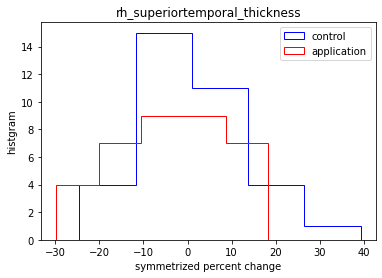

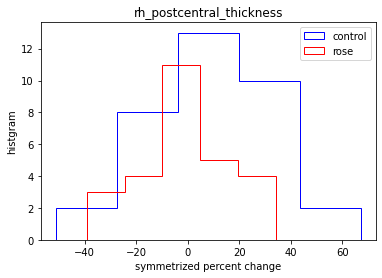

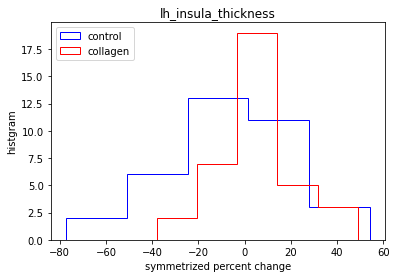

In [9]:
from scipy import stats
import matplotlib.pyplot as plt

temp_Xlabel="symmetrized percent change"
temp_Ylabel="histgram"

print("AS: application")
ttest_result_df_AS = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),df_result.columns[ii]]
    ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AS"),df_result.columns[ii]]
    ttest_result=stats.ttest_ind(ttest_A,ttest_B)
    ttest_result_df_AS=ttest_result_df_AS.append(pd.DataFrame([[df_result.columns[ii],ttest_result.pvalue]], columns=ttest_result_df_AS.columns),ignore_index=True)
print(ttest_result_df_AS.sort_values('pval').head(5))

minspcname=ttest_result_df_AS.sort_values('pval')['spc'].reset_index(drop=True)[0]
ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),minspcname]
ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AS"),minspcname]
plt.figure()
plt.hist(ttest_A, bins=5, histtype="step", color="b", label="control")
plt.hist(ttest_B, bins=5, histtype="step", color="r", label="application")
plt.title(minspcname)
plt.xlabel(temp_Xlabel)
plt.ylabel(temp_Ylabel)
plt.legend()
plt.savefig('figure_AS.png')

print("")

print("AT: rose")
ttest_result_df_AT = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),df_result.columns[ii]]
    ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AT"),df_result.columns[ii]]
    ttest_result=stats.ttest_ind(ttest_A,ttest_B)
    ttest_result_df_AT=ttest_result_df_AT.append(pd.DataFrame([[df_result.columns[ii],ttest_result.pvalue]], columns=ttest_result_df_AT.columns),ignore_index=True)
print(ttest_result_df_AT.sort_values('pval').head(5))

minspcname=ttest_result_df_AT.sort_values('pval')['spc'].reset_index(drop=True)[0]
ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),minspcname]
ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AT"),minspcname]
plt.figure()
plt.hist(ttest_A, bins=5, histtype="step", color="b", label="control")
plt.hist(ttest_B, bins=5, histtype="step", color="r", label="rose")
plt.title(minspcname)
plt.xlabel(temp_Xlabel)
plt.ylabel(temp_Ylabel)
plt.legend()
plt.savefig('figure_AT.png')
print("")

print("AU: collagen")
ttest_result_df_AU = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result.columns.get_loc('lh_bankssts_thickness'),df_result.columns.get_loc('rh_MeanThickness_thickness')+1):
    ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),df_result.columns[ii]]
    ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AU"),df_result.columns[ii]]
    ttest_result=stats.ttest_ind(ttest_A,ttest_B)
    ttest_result_df_AU=ttest_result_df_AU.append(pd.DataFrame([[df_result.columns[ii],ttest_result.pvalue]], columns=ttest_result_df_AU.columns),ignore_index=True)
print(ttest_result_df_AU.sort_values('pval').head(5))

minspcname=ttest_result_df_AU.sort_values('pval')['spc'].reset_index(drop=True)[0]
ttest_A=df_result.loc[(df_result["Arm_Type_01"]=="AR"),minspcname]
ttest_B=df_result.loc[(df_result["Arm_Type_01"]=="AU"),minspcname]
plt.figure()
plt.hist(ttest_A, bins=5, histtype="step", color="b", label="control")
plt.hist(ttest_B, bins=5, histtype="step", color="r", label="collagen")
plt.title(minspcname)
plt.xlabel(temp_Xlabel)
plt.ylabel(temp_Ylabel)
plt.legend()
plt.savefig('figure_AU.png')

In [10]:
from statsmodels.formula.api import ols
import copy

df_result_AS=copy.copy(df_result[df_result["Arm_Type_01"].isin(["AR","AS"])])
df_result_AS["Arm_Type_is_AR"] = 0
df_result_AS.loc[(df_result_AS["Arm_Type_01"]=="AR"),"Arm_Type_is_AR"] = 1
df_result_AS["Arm_Type_is_AS"] = 0
df_result_AS.loc[(df_result_AS["Arm_Type_01"]=="AS"),"Arm_Type_is_AS"] = 1

df_result_AT=copy.copy(df_result[df_result["Arm_Type_01"].isin(["AR","AT"])])
df_result_AT["Arm_Type_is_AR"] = 0
df_result_AT.loc[(df_result_AT["Arm_Type_01"]=="AR"),"Arm_Type_is_AR"] = 1
df_result_AT["Arm_Type_is_AT"] = 0
df_result_AT.loc[(df_result_AT["Arm_Type_01"]=="AT"),"Arm_Type_is_AT"] = 1

df_result_AU=copy.copy(df_result[df_result["Arm_Type_01"].isin(["AR","AU"])])
df_result_AU["Arm_Type_is_AR"] = 0
df_result_AU.loc[(df_result_AU["Arm_Type_01"]=="AR"),"Arm_Type_is_AR"] = 1
df_result_AU["Arm_Type_is_AU"] = 0
df_result_AU.loc[(df_result_AU["Arm_Type_01"]=="AU"),"Arm_Type_is_AU"] = 1
"""
print(df_result_AS["Arm_Type_is_AR"])
print(df_result_AS["Arm_Type_is_AS"])
print(df_result_AT["Arm_Type_is_AR"])
print(df_result_AT["Arm_Type_is_AT"])
print(df_result_AU["Arm_Type_is_AR"])
print(df_result_AU["Arm_Type_is_AU"])
"""
print("AS: application")
ftest_result_df_AS = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result_AS.columns.get_loc('lh_bankssts_thickness'),df_result_AS.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result_AS.loc[:,['Age_01',"Arm_Type_is_AR","Arm_Type_is_AS",df_result_AS.columns[ii]]]
    #print(ftest_A.head())
    model=ols(df_result_AS.columns[ii]+' ~ Arm_Type_is_AR + Arm_Type_is_AS + Age_01', ftest_A).fit()
    #print(model.summary())
    ftest_result=model.f_test([0, 1, -1, 0])
    ftest_result_df_AS=ftest_result_df_AS.append(pd.DataFrame([[df_result_AS.columns[ii],ftest_result.pvalue]], columns=ftest_result_df_AS.columns),ignore_index=True)
print(ftest_result_df_AS.sort_values('pval').head(5))

print("")
print("AT: rose")
ftest_result_df_AT = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result_AT.columns.get_loc('lh_bankssts_thickness'),df_result_AT.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result_AT.loc[:,['Age_01',"Arm_Type_is_AR","Arm_Type_is_AT",df_result_AT.columns[ii]]]
    #print(ftest_A.head())
    model=ols(df_result_AT.columns[ii]+' ~ Arm_Type_is_AR + Arm_Type_is_AT + Age_01', ftest_A).fit()
    #print(model.summary())
    ftest_result=model.f_test([0, 1, -1, 0])
    ftest_result_df_AT=ftest_result_df_AT.append(pd.DataFrame([[df_result_AT.columns[ii],ftest_result.pvalue]], columns=ftest_result_df_AT.columns),ignore_index=True)
print(ftest_result_df_AT.sort_values('pval').head(5))

print("")
print("AU: collagen")
ftest_result_df_AU = pd.DataFrame(index=[], columns=['spc', 'pval'])
for ii in range(df_result_AU.columns.get_loc('lh_bankssts_thickness'),df_result_AU.columns.get_loc('rh_MeanThickness_thickness')+1):
    ftest_A=df_result_AU.loc[:,['Age_01',"Arm_Type_is_AR","Arm_Type_is_AU",df_result_AU.columns[ii]]]
    #print(ftest_A.head())
    model=ols(df_result_AU.columns[ii]+' ~ Arm_Type_is_AR + Arm_Type_is_AU + Age_01', ftest_A).fit()
    #print(model.summary())
    ftest_result=model.f_test([0, 1, -1, 0])
    ftest_result_df_AU=ftest_result_df_AU.append(pd.DataFrame([[df_result_AS.columns[ii],ftest_result.pvalue]], columns=ftest_result_df_AU.columns),ignore_index=True)
print(ftest_result_df_AU.sort_values('pval').head(5))

AS: application
                                spc                 pval
69  rh_transversetemporal_thickness  0.03994380275266272
59          rh_precentral_thickness  0.04140305353063925
65    rh_superiortemporal_thickness  0.04386477276912116
57         rh_postcentral_thickness  0.05539271343100495
66       rh_supramarginal_thickness  0.05803745622446373

AT: rose
                                      spc                 pval
57               rh_postcentral_thickness  0.06255572950228915
45          rh_isthmuscingulate_thickness   0.1114056218736181
49       rh_medialorbitofrontal_thickness  0.17268079252117338
59                rh_precentral_thickness  0.18642112945886774
24  lh_rostralanteriorcingulate_thickness  0.22150123994906762

AU: collagen
                                  spc                  pval
33                lh_insula_thickness   0.01751660090378523
56         rh_pericalcarine_thickness  0.049584342265522025
25  lh_rostralmiddlefrontal_thickness   0.06210671454663224


AS: application
                                  spc                 pval
42              rh_fusiform_thickness  0.02728325981299383
62  rh_rostralmiddlefrontal_thickness  0.03586935639092355
12   lh_medialorbitofrontal_thickness  0.03680397973915914
10  lh_lateralorbitofrontal_thickness   0.0630320113220731
54         rh_parsorbitalis_thickness  0.10713069490393388

AT: rose
                                  spc                 pval
46      rh_lateraloccipital_thickness  0.06168183969637898
15           lh_paracentral_thickness  0.16395743829716877
10  lh_lateralorbitofrontal_thickness  0.16594712290271044
28      lh_superiortemporal_thickness  0.19264748795535838
39   rh_caudalmiddlefrontal_thickness  0.22033376671408827

AU: collagen
                                  spc                  pval
62  rh_rostralmiddlefrontal_thickness  0.004746047764172065
10  lh_lateralorbitofrontal_thickness   0.00861118213692576
52           rh_paracentral_thickness  0.016898792523697522
46      rh_l

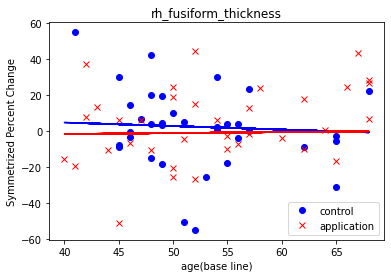

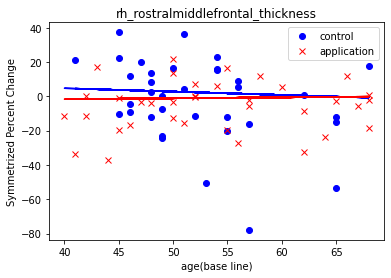

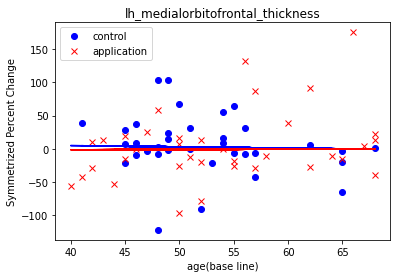

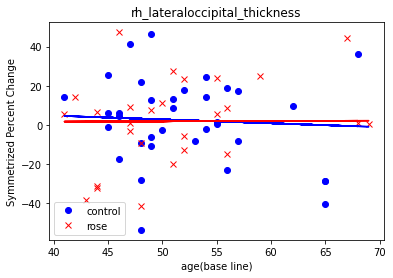

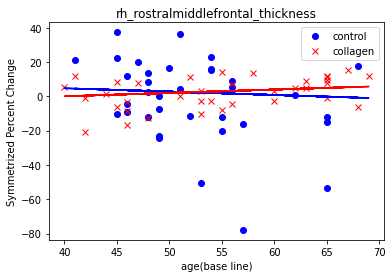

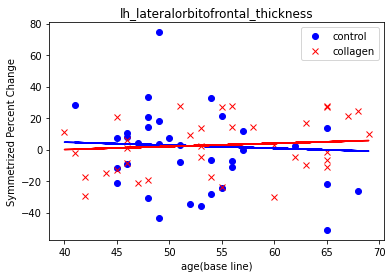

In [11]:
# different slope
temp_Xlabel="age(base line)"
temp_Ylabel="Symmetrized Percent Change"

def plot_dods(arg1_ctrl, arg2_intrv, arg3_intrvname, df_result_ARG4, ftest_result_sorted_ARG5, figure_num):
    for jj in range(figure_num):
        minspcname=ftest_result_sorted_ARG5['spc'].reset_index(drop=True)[jj]
        ftest_A=df_result_ARG4.loc[:,['age_CTRL','age_INTRV',"is_CTRL","is_INTRV",df_result_ARG4.columns[ii]]]
        model=ols(df_result_ARG4.columns[ii]+' ~ is_CTRL + is_INTRV + age_CTRL + age_INTRV', ftest_A).fit()
        #minspcname=minspcname[:-2] # remove suffix
        """print("")
        print(minspcname)
        print(model.summary())"""
        # plot
        plot_ctrl=df_result_ARG4.loc[(df_result["Arm_Type_01"]==arg1_ctrl),['Age_01',minspcname]]
        plot_intrv=df_result_ARG4.loc[(df_result["Arm_Type_01"]==arg2_intrv),['Age_01',minspcname]]
        plt.figure()
        plt.plot(plot_ctrl['Age_01'],plot_ctrl[minspcname], color="b", label="control",marker="o", linestyle='None')
        plt.plot(plot_intrv['Age_01'],plot_intrv[minspcname], color="r", label=arg3_intrvname,marker="x", linestyle='None')
        # line
        plt.plot(df_result_ARG4['Age_01'],\
                 model.params["Intercept"]+model.params["is_CTRL"]+df_result_ARG4['Age_01']*model.params["age_CTRL"], color="b")
        plt.plot(df_result_ARG4['Age_01'],\
                 model.params["Intercept"]+model.params["is_INTRV"]+df_result_ARG4['Age_01']*model.params["age_INTRV"], color="r")
        # style
        plt.title(minspcname)
        plt.ylabel(temp_Ylabel)
        plt.xlabel(temp_Xlabel)
        plt.legend()
        # save figure
        plt.savefig("dods_corr_figure_"+arg2_intrv+"_"+str(jj+1)+".png")
        #plt.clf() # show no figure
    return

def calc_dods(arg1_ctrl, arg2_intrv, df_result_arg3):
    df_result_FUNC=copy.copy(df_result_arg3[df_result_arg3["Arm_Type_01"].isin([arg1_ctrl, arg2_intrv])])
    df_result_FUNC["is_CTRL"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg1_ctrl),"is_CTRL"] = 1
    df_result_FUNC["is_INTRV"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg2_intrv),"is_INTRV"] = 1
    df_result_FUNC["age_CTRL"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg1_ctrl),"age_CTRL"] = df_result_FUNC["Age_01"]
    df_result_FUNC["age_INTRV"] = 0
    df_result_FUNC.loc[(df_result_FUNC["Arm_Type_01"]==arg2_intrv),"age_INTRV"] = df_result_FUNC["Age_01"]
    
    ftest_result_df2_FUNC = pd.DataFrame(index=[], columns=['spc', 'pval'])
    for ii in range(df_result_FUNC.columns.get_loc('lh_bankssts_thickness'),df_result_FUNC.columns.get_loc('rh_MeanThickness_thickness')+1):
        ftest_A=df_result_FUNC.loc[:,['age_CTRL','age_INTRV',"is_CTRL","is_INTRV",df_result_FUNC.columns[ii]]]
        model=ols(df_result_FUNC.columns[ii]+' ~ is_CTRL + is_INTRV + age_CTRL + age_INTRV', ftest_A).fit()
        #ftest_result=model.f_test([0, 0, 0, 1, -1])
        ftest_result=model.f_test([0, 0, 0, -1, 1])
        ftest_result_df2_FUNC=ftest_result_df2_FUNC.append(pd.DataFrame([[df_result_FUNC.columns[ii],ftest_result.pvalue]], columns=ftest_result_df2_FUNC.columns),ignore_index=True)
    return df_result_FUNC,ftest_result_df2_FUNC.sort_values('pval')

print("AS: application")
df_result_AS,ftest_result_df2_AS_sorted=calc_dods("AR", "AS", df_result)
print(ftest_result_df2_AS_sorted.head(5))
print("")

print("AT: rose")
df_result_AT,ftest_result_df2_AT_sorted=calc_dods("AR", "AT", df_result)
print(ftest_result_df2_AT_sorted.head(5))
print("")

print("AU: collagen")
df_result_AU,ftest_result_df2_AU_sorted=calc_dods("AR", "AU", df_result)
print(ftest_result_df2_AU_sorted.head(5))
print("")

# figure
# correlation
plot_dods("AR", "AS", "application", df_result_AS, ftest_result_df2_AS_sorted, 3)
plot_dods("AR", "AT", "rose", df_result_AT, ftest_result_df2_AT_sorted, 1)
plot_dods("AR", "AU", "collagen", df_result_AU, ftest_result_df2_AU_sorted, 2)


In [12]:
#print(df_result)
corr_matp = df_result.corr(method='pearson')
#print(corr_matp)
corr_matp=corr_matp.dropna(how = 'all')
corr_matp=corr_matp.dropna(axis = 'columns')
corr_matp.to_csv('~/Downloads/spc_corr_matp.csv')

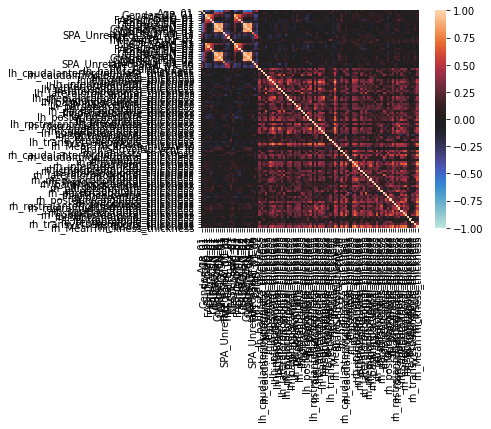

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matp,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_matp.columns.values,
            yticklabels=corr_matp.columns.values
           )
plt.show()
#fig = plt.figure(figsize=(10,10),dpi=200)
#fig.show()

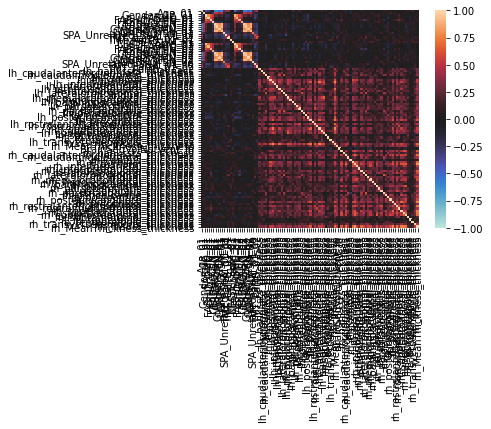

In [14]:
corr_mats = df_result.corr(method='spearman')
corr_mats=corr_mats.dropna(how = 'all')
corr_mats=corr_mats.dropna(axis = 'columns')
corr_mats.to_csv('~/Downloads/spc_corr_mats.csv')
sns.heatmap(corr_mats,square=True,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=False, # True:格子の中に値を表示
#            fmt='.1f',
            xticklabels=corr_mats.columns.values,
            yticklabels=corr_mats.columns.values
           )
plt.show()

In [15]:
print(corr_matp)

                                   Age_01  Gender_12_01  FABHQ_01  \
Age_01                           1.000000     -0.135715 -0.446157   
Gender_12_01                    -0.135715      1.000000 -0.002239   
FABHQ_01                        -0.446157     -0.002239  1.000000   
FABHQ_DMN_01                    -0.330805     -0.090619  0.783977   
FABHQ_CEN_01                    -0.168891     -0.031788  0.667580   
...                                   ...           ...       ...   
rh_frontalpole_thickness         0.029167      0.088219 -0.052881   
rh_temporalpole_thickness       -0.025933     -0.032642 -0.004650   
rh_transversetemporal_thickness  0.069961     -0.016723 -0.019031   
rh_insula_thickness             -0.022944     -0.025605  0.073583   
rh_MeanThickness_thickness       0.032177      0.095434  0.087137   

                                 FABHQ_DMN_01  FABHQ_CEN_01  FABHQ_SN_01  \
Age_01                              -0.330805     -0.168891     0.123072   
Gender_12_01       

In [16]:
print(corr_mats)

                                   Age_01  Gender_12_01  FABHQ_01  \
Age_01                           1.000000     -0.125894 -0.399042   
Gender_12_01                    -0.125894      1.000000 -0.014503   
FABHQ_01                        -0.399042     -0.014503  1.000000   
FABHQ_DMN_01                    -0.292081     -0.096755  0.797504   
FABHQ_CEN_01                    -0.154955     -0.026424  0.637532   
...                                   ...           ...       ...   
rh_frontalpole_thickness         0.062945      0.077285 -0.077939   
rh_temporalpole_thickness       -0.030631     -0.020861 -0.068392   
rh_transversetemporal_thickness  0.163391     -0.033179 -0.038791   
rh_insula_thickness              0.022458     -0.016490  0.076737   
rh_MeanThickness_thickness       0.012959      0.055033  0.058696   

                                 FABHQ_DMN_01  FABHQ_CEN_01  FABHQ_SN_01  \
Age_01                              -0.292081     -0.154955     0.098641   
Gender_12_01       